# Sommaire :
 
 **<a href="#C1">IMPORTATION </a>**
 
 **<a href="#C2">DESCRIPTION DES DONNEES </a>**
 
 **<a href="#C3">DATA CLEANING </a>**
 
 **<a href="#C4">ANALYSE EXPLORATOIRE </a>**
 
 **<a href="#C5">FEATURE ENGINEERING </a>**
 - <a href ="#C51"> Transformation logarithmique</a>
 - <a href ="#C52"> Renommage de variables</a>
 - <a href ="#C53"> Label encoding</a>
 - <a href ="#C54"> One Hot Encodin</a>

# <a name="C1"> IMPORTATION </a>
## <a name="C11"> Importation des libraries</a>

In [1]:
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing (Pré-traitement)

from sklearn.preprocessing import LabelEncoder

## <a name="C12"> Importation du jeu de données</a>

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

# <a name="C2"> DESCRIPTION DES DONNEES </a>
## <a name="C21"> 2.1) Display </a>

In [3]:
# Les 5 premières lignes
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
# Les 5 dernières lignes
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,...,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


In [5]:
# 5 lignes au hasard
data.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1651,22983,2016,Multifamily LR (1-4),Low-Rise Multifamily,Villa Anita Apartments,2231 Franklin Avenue East,Seattle,WA,98102.0,2902200595,...,126557.89840,431816.0,0.000000,0.0,False,NaN,Compliant,NaN,3.01,0.15
141,229,2016,SPS-District K-12,K-12 School,Martin Luther King Jr. Elementary,6725 45th Ave S,Seattle,WA,98118.0,3812400550,...,423604.59380,1445339.0,6831.198730,683120.0,True,NaN,Error - Correct Default Data,NaN,46.36,0.69
2703,26677,2016,Multifamily LR (1-4),Low-Rise Multifamily,Weedin Place,6909 Weedin Pl NE,Seattle,WA,98115.0,9528103580,...,238479.40630,813692.0,4465.210449,446521.0,False,NaN,Compliant,NaN,29.39,0.56
890,20160,2016,NonResidential,Residence Hall,Sigma Kappa Corp,4510 22nd Ave NE,Seattle,WA,98105.0,1321300090,...,96365.70313,328800.0,11715.099610,1171510.0,False,NaN,Compliant,NaN,64.51,3.08
2389,25490,2016,Multifamily LR (1-4),Senior Care Community,Ida Culver House Ravenna,2315 NE 65th St.,Seattle,WA,98115.0,7173700480,...,718027.37500,2449909.0,34177.062500,3417706.0,False,NaN,Compliant,NaN,198.59,1.99


## <a name="C21"> 2.2) Structure </a>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Nous observons des NaN dans certaines colonnes

In [7]:
# Compter le nbre de colonnes pour chaque type 
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [8]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


Nous constatons que de nombreuse variables ont de nombreuses valeurs

## <a name="C23"> 2.3) NaN & Duplicated </a>

In [9]:
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


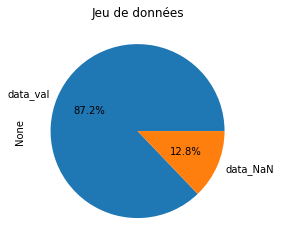

In [10]:
data_val = data.count().sum() # Nbre de valeurs
data_NaN = data.isnull().sum().sum()  # Nbre de valeurs manquantes

# Mettre sous forme de serie
S1 = pd.Series([data_val, data_NaN],index=["data_val","data_NaN"])

# Diagramme en secteur
S1.plot.pie(autopct="%1.1f%%")
plt.title("Jeu de données")
plt.show()

In [11]:
data.duplicated().sum()

0

# <a name="C3"> DATA CLEANING </a>

## <a name="C31"> 3.1) Les variables pertinentes </a>

Nous allons selectionner les cononnes importantes pour notre analyse

In [12]:
# Liste des colonnes
data.columns.values

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       '

In [13]:
#Suppression de colonnes
data= data.drop(['OSEBuildingID','PropertyName','ZipCode','City','State','Address','TaxParcelIdentificationNumber','Latitude','Longitude',
                 'YearsENERGYSTARCertified','ListOfAllPropertyUseTypes','LargestPropertyUseType','LargestPropertyUseTypeGFA',
                 'SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType',
                 'ThirdLargestPropertyUseTypeGFA','Comments','Outlier','DefaultData','ComplianceStatus'], axis= 1)
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,2016,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41,956110,196718,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


## <a name="C32"> 3.2) Valeurs manquantes </a>

In [14]:
data.isnull().sum()

DataYear                    0
BuildingType                0
PrimaryPropertyType         0
CouncilDistrictCode         0
Neighborhood                0
YearBuilt                   0
NumberofBuildings           8
NumberofFloors              0
PropertyGFATotal            0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
ENERGYSTARScore           843
SiteEUI(kBtu/sf)            7
SiteEUIWN(kBtu/sf)          6
SourceEUI(kBtu/sf)          9
SourceEUIWN(kBtu/sf)        9
SiteEnergyUse(kBtu)         5
SiteEnergyUseWN(kBtu)       6
SteamUse(kBtu)              9
Electricity(kWh)            9
Electricity(kBtu)           9
NaturalGas(therms)          9
NaturalGas(kBtu)            9
TotalGHGEmissions           9
GHGEmissionsIntensity       9
dtype: int64

### a.) Suppression de lignes

In [15]:
# Supprimer les NaN de la colonne "SourceEUI(kBtu/sf)"
data = data.dropna(subset=['SourceEUI(kBtu/sf)'])

# Supprimer les NaN de la colonne "SourceEUI(kBtu/sf)"
data = data.dropna(subset=['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)'])

# Mise à jour des indexes
data = data.reset_index(drop = True)

In [16]:
data.isna().sum()

DataYear                    0
BuildingType                0
PrimaryPropertyType         0
CouncilDistrictCode         0
Neighborhood                0
YearBuilt                   0
NumberofBuildings           0
NumberofFloors              0
PropertyGFATotal            0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
ENERGYSTARScore           832
SiteEUI(kBtu/sf)            0
SiteEUIWN(kBtu/sf)          0
SourceEUI(kBtu/sf)          0
SourceEUIWN(kBtu/sf)        0
SiteEnergyUse(kBtu)         0
SiteEnergyUseWN(kBtu)       0
SteamUse(kBtu)              0
Electricity(kWh)            0
Electricity(kBtu)           0
NaturalGas(therms)          0
NaturalGas(kBtu)            0
TotalGHGEmissions           0
GHGEmissionsIntensity       0
dtype: int64

### b.) K-NN Imputer

Nous allons remplacer les NaN restants de la variable **ENERGYSTARScore** par la méthode K-NN Imputer

In [17]:
X = data.drop(['DataYear','BuildingType','PrimaryPropertyType','CouncilDistrictCode','Neighborhood','YearBuilt'],axis=1)

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data1 =imputer.fit_transform(X)

# Convertir array en DataFrame
data1 = pd.DataFrame(data1,columns=['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal','PropertyGFAParking', 'PropertyGFABuilding(s)', 
                                    'ENERGYSTARScore','SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)', 
                                    'SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)','Electricity(kBtu)', 
                                    'NaturalGas(therms)', 'NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity'])
data1.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1.0,12.0,88434.0,0.0,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,1.0,11.0,103566.0,15064.0,88502.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,1.0,41.0,956110.0,196718.0,759392.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,1.0,10.0,61320.0,0.0,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,1.0,18.0,175580.0,62000.0,113580.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [19]:
# remplacer les NaN de data par les valeurs data1
data.loc[data['ENERGYSTARScore'].isnull(),'ENERGYSTARScore']=data1['ENERGYSTARScore']
data.isnull().sum()

DataYear                  0
BuildingType              0
PrimaryPropertyType       0
CouncilDistrictCode       0
Neighborhood              0
YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
ENERGYSTARScore           0
SiteEUI(kBtu/sf)          0
SiteEUIWN(kBtu/sf)        0
SourceEUI(kBtu/sf)        0
SourceEUIWN(kBtu/sf)      0
SiteEnergyUse(kBtu)       0
SiteEnergyUseWN(kBtu)     0
SteamUse(kBtu)            0
Electricity(kWh)          0
Electricity(kBtu)         0
NaturalGas(therms)        0
NaturalGas(kBtu)          0
TotalGHGEmissions         0
GHGEmissionsIntensity     0
dtype: int64

## <a name="C33"> 3.3) Outliers </a>

In [20]:
data.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3364.0,3364.000000,3364.000000,3364.000000,3364.000000,3.364000e+03,3364.000000,3.364000e+03,3364.000000,3364.000000,...,3364.000000,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03,3364.000000,3364.000000
mean,2016.0,4.438466,1968.558859,1.107015,4.711356,9.461475e+04,7999.169738,8.661558e+04,67.983650,54.768757,...,137.906807,5.412420e+06,5.285134e+06,2.748408e+05,1.087184e+06,3.709471e+06,1.369304e+04,1.369304e+06,119.798291,1.176718
std,0.0,2.120533,33.111519,2.109652,5.503620,2.180424e+05,32352.917476,2.070524e+05,25.430706,56.306284,...,139.110930,2.163212e+07,1.595174e+07,3.913909e+06,4.354335e+06,1.485699e+07,6.712690e+04,6.712690e+06,539.064566,1.822028
min,2016.0,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,1.000000,0.000000,...,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,2016.0,3.000000,1948.000000,1.000000,2.000000,2.848650e+04,0.000000,2.775600e+04,53.000000,27.900000,...,78.475000,9.296088e+05,9.781800e+05,0.000000e+00,1.874762e+05,6.396690e+05,0.000000e+00,0.000000e+00,9.507500,0.210000
50%,2016.0,4.000000,1974.500000,1.000000,4.000000,4.421600e+04,0.000000,4.322800e+04,74.500000,38.700001,...,101.149998,1.807103e+06,1.910731e+06,0.000000e+00,3.451519e+05,1.177658e+06,3.242567e+03,3.242570e+05,33.960000,0.615000
75%,2016.0,7.000000,1997.000000,1.000000,5.000000,9.110025e+04,0.000000,8.439550e+04,88.500000,60.400002,...,148.424995,4.224995e+06,4.386009e+06,0.000000e+00,8.291652e+05,2.829112e+06,1.188746e+04,1.188746e+06,93.905000,1.372500
max,2016.0,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,834.400024,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


Nous constatons des minimums négatifs au niveau de certains variables alors qu'il n'y devrrait pas avoir de valeurs négatives ; d'ou des valeurs aberrantes au niveau de ces variables.

In [21]:
data.drop(data[data['SourceEUIWN(kBtu/sf)']<0].index, inplace=True)
data.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3363.0,3363.000000,3363.000000,3363.000000,3363.000000,3.363000e+03,3363.000000,3.363000e+03,3363.000000,3363.000000,...,3363.000000,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3.363000e+03,3363.000000,3363.000000
mean,2016.0,4.438894,1968.545644,1.107047,4.710972,9.462742e+04,8001.548320,8.662587e+04,67.974130,54.782932,...,137.948439,5.413928e+06,5.286634e+06,2.749225e+05,1.087517e+06,3.710608e+06,1.369711e+04,1.369711e+06,119.834151,1.177074
std,0.0,2.120703,33.107570,2.109965,5.504394,2.180736e+05,32357.434495,2.070823e+05,25.428492,56.308655,...,139.110656,2.163516e+07,1.595388e+07,3.914489e+06,4.354939e+06,1.485905e+07,6.713647e+04,6.713647e+06,539.140717,1.822182
min,2016.0,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,1.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2016.0,3.000000,1948.000000,1.000000,2.000000,2.848100e+04,0.000000,2.775200e+04,53.000000,27.900000,...,78.500000,9.301593e+05,9.790589e+05,0.000000e+00,1.877346e+05,6.405505e+05,0.000000e+00,0.000000e+00,9.535000,0.210000
50%,2016.0,4.000000,1974.000000,1.000000,4.000000,4.420200e+04,0.000000,4.322800e+04,74.500000,38.700001,...,101.199997,1.807738e+06,1.913404e+06,0.000000e+00,3.451739e+05,1.177733e+06,3.247596e+03,3.247600e+05,34.000000,0.620000
75%,2016.0,7.000000,1997.000000,1.000000,5.000000,9.110950e+04,0.000000,8.440200e+04,88.250000,60.400002,...,148.449997,4.225118e+06,4.387392e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,93.940000,1.375000
max,2016.0,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,834.400024,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


In [22]:
data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,2016,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41,956110,196718,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


**N.B** : Dans le projet seuls les bâtiments non destinés à l'habitation seront étudiés. 

**Nous allons donc supprimer toutes les lignes correspondant à des habitations**

In [23]:
data['BuildingType'].unique() # La liste des type d'habitation

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [24]:
# Garder uniquement les habitations autres que celles contenant 'Multifamily'

data = data[~data['BuildingType'].str.contains("Multifamily")]
data = data.reset_index(drop = True)

data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [25]:
data.shape

(1663, 25)

# <a name="4"> ANALYSE EXPLORATOIRE </a>
## <a name="C41"> 4.1) Analyse des variables des bâtiments </a>

 Nous allons regarder la répartition au niveau des differentes variables liées aux caractéristiques des bâtiments

### a.) Type de bâtiments

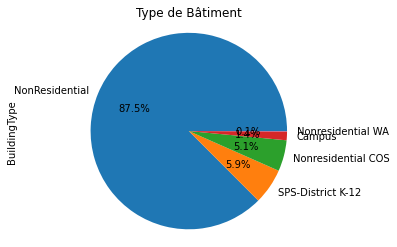

In [26]:
# Diagramme en secteurs
data["BuildingType"].value_counts(normalize=True).plot(kind='pie',autopct="%1.1f%%")
plt.axis('equal')
plt.title("Type de Bâtiment")
plt.show() # Affiche le graphique

Nous constatons que les bâtiments typés 'Non residential' sont largement majoritaire

### b.) Type de propriété première

In [27]:
# Liste des titre de propriété

data['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

In [28]:
effectifs = data["PrimaryPropertyType"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["PrimaryPropertyType"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = (tab_grade["n"]/len(data)).round(3) # len(data) renvoie la taille de l'échantillon

display(tab_grade)

,PrimaryPropertyType,n,f
0,Small- and Mid-Sized Office,290,0.174
1,Other,249,0.150
2,Warehouse,187,0.112
3,Large Office,172,0.103
4,K-12 School,139,0.084
5,Mixed Use Property,113,0.068
6,Retail Store,91,0.055
7,Hotel,76,0.046
8,Worship Facility,71,0.043
9,Distribution Center,53,0.032


### c.) Conseil de district

In [29]:
data['CouncilDistrictCode'].unique()

array([7, 3, 2, 4, 5, 6, 1], dtype=int64)

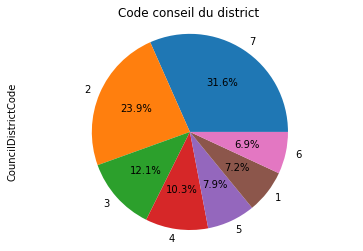

In [30]:
data["CouncilDistrictCode"].value_counts(normalize=True).plot(kind='pie',autopct="%1.1f%%")
plt.axis('equal')
plt.title("Code conseil du district")
plt.show()

Plus de la moitié des bâtiments sontsitués dans les conseils de district 7 et 2

### c.) Quartier

In [31]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [32]:
effectifs = data["Neighborhood"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab_grade = pd.DataFrame(modalites, columns = ["Neighborhood"]) # création du tableau à partir des modalités
tab_grade["n"] = effectifs.values
tab_grade["f"] = (tab_grade["n"]/len(data)).round(3) # len(data) renvoie la taille de l'échantillon

display(tab_grade)

,Neighborhood,n,f
0,DOWNTOWN,358,0.215
1,GREATER DUWAMISH,346,0.208
2,MAGNOLIA / QUEEN ANNE,151,0.091
3,LAKE UNION,148,0.089
4,NORTHEAST,127,0.076
5,EAST,121,0.073
6,NORTHWEST,81,0.049
7,BALLARD,64,0.038
8,NORTH,58,0.035
9,CENTRAL,50,0.030


In [33]:
Quart = list(tab_grade.loc[:3,'Neighborhood'])
Quart 

['DOWNTOWN', 'GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE', 'LAKE UNION']

In [34]:
data.loc[(data['Neighborhood'].isin(Quart)),'PrimaryPropertyType'].value_counts()


Small- and Mid-Sized Office    212
Large Office                   165
Warehouse                      153
Other                          129
Mixed Use Property              72
Hotel                           60
Distribution Center             47
Retail Store                    43
K-12 School                     29
Self-Storage Facility           13
Refrigerated Warehouse          12
Worship Facility                12
Supermarket / Grocery Store     10
Restaurant                      10
University                       9
Laboratory                       9
Residence Hall                   5
Senior Care Community            4
Medical Office                   4
Low-Rise Multifamily             2
Office                           2
Hospital                         1
Name: PrimaryPropertyType, dtype: int64

**60%** des bâtiment sont situés dans 4 quartiers sur les 19 que compte la ville et la pluspart de ces constructions sont des bureau et magasins


### d.) Année de construction

 

In [35]:
data['YearBuilt'].unique()

array([1927, 1996, 1969, 1926, 1980, 1999, 1904, 1998, 1928, 1922, 2004,
       1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978, 1949,
       1989, 1906, 1994, 1992, 1990, 1950, 1900, 1954, 1911, 1973, 1920,
       1910, 1982, 1908, 1959, 2000, 1997, 1962, 1970, 2008, 1948, 1965,
       1929, 2010, 1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963,
       2006, 1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960,
       1937, 1966, 1968, 1925, 1924, 2005, 1931, 1972, 1914, 1913, 1995,
       1981, 1976, 1909, 1988, 1979, 1947, 1984, 1956, 1912, 1977, 1921,
       1945, 1974, 1975, 1946, 1967, 1987, 1940, 1932, 1993, 1918, 1905,
       1902, 1939, 1944, 1917, 1942, 1903, 2012, 2013, 1919, 1901, 1936,
       1935, 2014, 2015], dtype=int64)

il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion.

Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :

In [36]:
# Créer la colonne
data['AgeBuilt']= data['DataYear'] - data['YearBuilt']

# Supprimer la colonne
data.drop('YearBuilt', axis=1, inplace=True)

# Déplacer la nouvelle colonne'AgeBuilt' à la place de l'ancienne 'YearBuilt'
col = data.pop('AgeBuilt')
data.insert(loc= 5 , column= 'AgeBuilt', value= col)

data.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,7,DOWNTOWN,89,1.0,12,88434,0,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2016,NonResidential,Hotel,7,DOWNTOWN,20,1.0,11,103566,15064,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,2016,NonResidential,Hotel,7,DOWNTOWN,47,1.0,41,956110,196718,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,2016,NonResidential,Hotel,7,DOWNTOWN,90,1.0,10,61320,0,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,2016,NonResidential,Hotel,7,DOWNTOWN,36,1.0,18,175580,62000,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


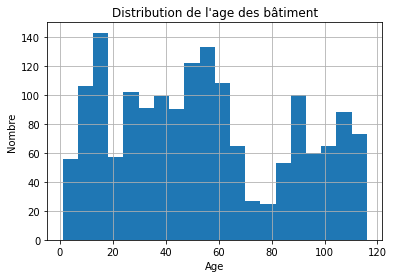

In [37]:
# la representation de la distribution
data['AgeBuilt'].hist(bins=20)
plt.title("Distribution de l'age des bâtiment")
plt.xlabel("Age")
plt.ylabel("Nombre")
plt.show()

In [38]:
data['AgeBuilt'].mean()

54.101022248947686

## <a name="C42"> 4.2) Analyse de la corrélation entre certaines variables </a>

Certaines variables apparaissent déjà comme redondantes :
Nous allons analyser la corrélation entre ces variables quantitatives de mesure de l'énergie.

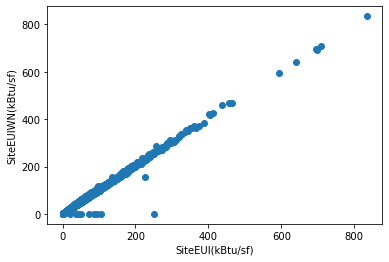

Coefficient de corrélation:
 0.9930815732906453
------------------------------------------------------------------------------------------------------------------------


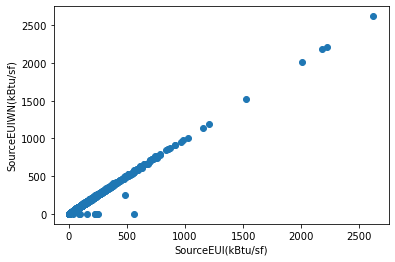

Coefficient de corrélation:
 0.9941453107735337
------------------------------------------------------------------------------------------------------------------------


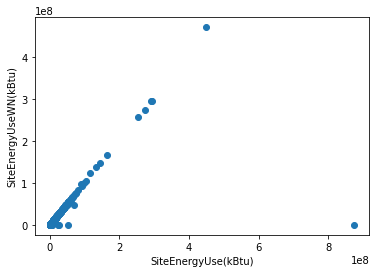

Coefficient de corrélation:
 0.7040185926139486
------------------------------------------------------------------------------------------------------------------------


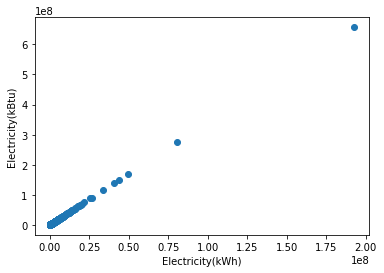

Coefficient de corrélation:
 0.9999999999999998
------------------------------------------------------------------------------------------------------------------------


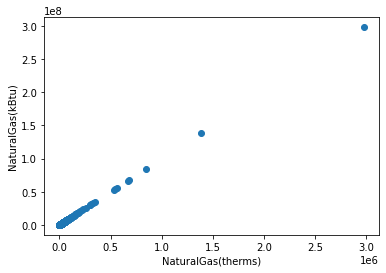

Coefficient de corrélation:
 0.9999999999999996


In [39]:
import scipy.stats as st

# diagramme de dispersion
plt.plot(data["SiteEUI(kBtu/sf)"],data["SiteEUIWN(kBtu/sf)"],'o')
plt.xlabel("SiteEUI(kBtu/sf)"), plt.ylabel("SiteEUIWN(kBtu/sf)")
plt.show()
#Coef de corrélation
print("Coefficient de corrélation:\n",st.pearsonr(data["SiteEUI(kBtu/sf)"],data["SiteEUIWN(kBtu/sf)"])[0])

print('------'*20)

plt.plot(data["SourceEUI(kBtu/sf)"],data["SourceEUIWN(kBtu/sf)"],'o')
plt.xlabel("SourceEUI(kBtu/sf)"), plt.ylabel("SourceEUIWN(kBtu/sf)")
plt.show()
print("Coefficient de corrélation:\n",st.pearsonr(data["SourceEUI(kBtu/sf)"],data["SourceEUIWN(kBtu/sf)"])[0])

print('------'*20)

plt.plot(data["SiteEnergyUse(kBtu)"],data["SiteEnergyUseWN(kBtu)"],'o')
plt.xlabel("SiteEnergyUse(kBtu)"), plt.ylabel("SiteEnergyUseWN(kBtu)")
plt.show()
print("Coefficient de corrélation:\n",st.pearsonr(data["SiteEnergyUse(kBtu)"],data["SiteEnergyUseWN(kBtu)"])[0])

print('------'*20)

plt.plot(data["Electricity(kWh)"],data["Electricity(kBtu)"],'o')
plt.xlabel("Electricity(kWh)"), plt.ylabel("Electricity(kBtu)")
plt.show()
print("Coefficient de corrélation:\n",st.pearsonr(data["Electricity(kWh)"],data["Electricity(kBtu)"])[0])

print('------'*20)

plt.plot(data["NaturalGas(therms)"],data["NaturalGas(kBtu)"],'o')
plt.xlabel("NaturalGas(therms)"), plt.ylabel("NaturalGas(kBtu)")
plt.show()
print("Coefficient de corrélation:\n",st.pearsonr(data["NaturalGas(therms)"],data["NaturalGas(kBtu)"])[0])

Comme on pouvait s'y attendre, certaines variables sonrépétées mais en des unités de mesures différentes. Nous allons procéder donc à la suppression de certaines.

In [40]:
data = data.drop(["DataYear","SiteEUIWN(kBtu/sf)","SourceEUIWN(kBtu/sf)","SiteEnergyUseWN(kBtu)","Electricity(kWh)","NaturalGas(therms)"],axis=1)
data.sample(3)

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1177,NonResidential,Small- and Mid-Sized Office,5,NORTH,42,1.0,2,24291,0,24291,87.0,37.900002,119.000000,920430.625,0.0,920430.0,0.0,6.42,0.26
316,NonResidential,Large Office,5,NORTH,33,1.0,5,122250,0,122250,93.0,43.500000,136.399994,5535626.000,0.0,5535625.0,0.0,38.59,0.32
679,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,108,1.0,3,28800,0,28800,50.0,38.400002,95.500000,1345025.750,0.0,923904.0,421122.0,28.81,1.00


 ## <a name="C43"> 4.3) Heatmap des Corrélations linéaires </a>

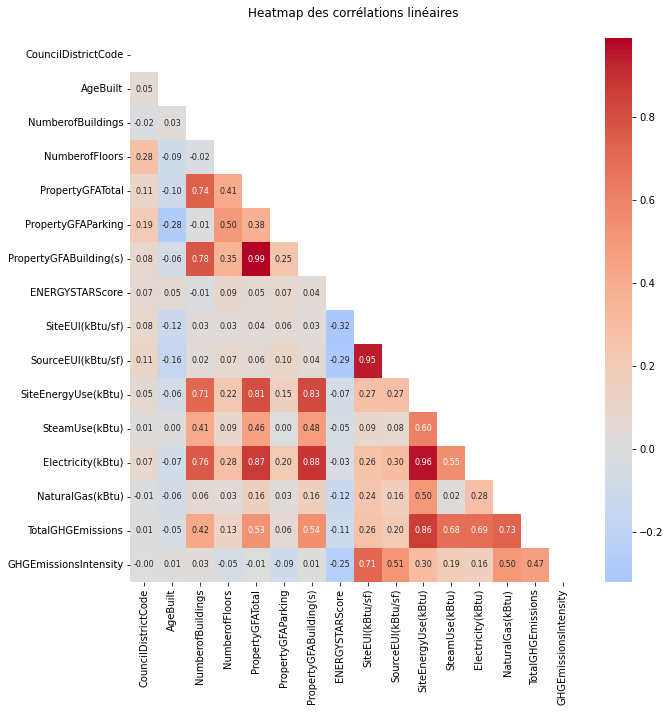

In [41]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")

plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

Pour les varaibles à prédire TotalGHGEmissions et SiteEnergyUse(kBtu), on remarque des corrélations linéaires avec les variables de relevés (les consommations) mais également avec le nombre de batiments ains que les surfaces au sol.

On remarque sur ce Heatmap de fortes corrélations linéaires entre variables. Ces corrélations peuvent amener des problèmes de colinéarité dans nos futurs modèles.

 ## <a name="C44"> 4.4) Variables à prédire </a>
 
 Les Variables cibles de notre étude sont : 

- **TotalGHGEmissions**
- **SiteEnergyUse(kBtu)**

Nous allons à présent regarder la répartition de ces 2 variables en fonction du type de bâtiemen


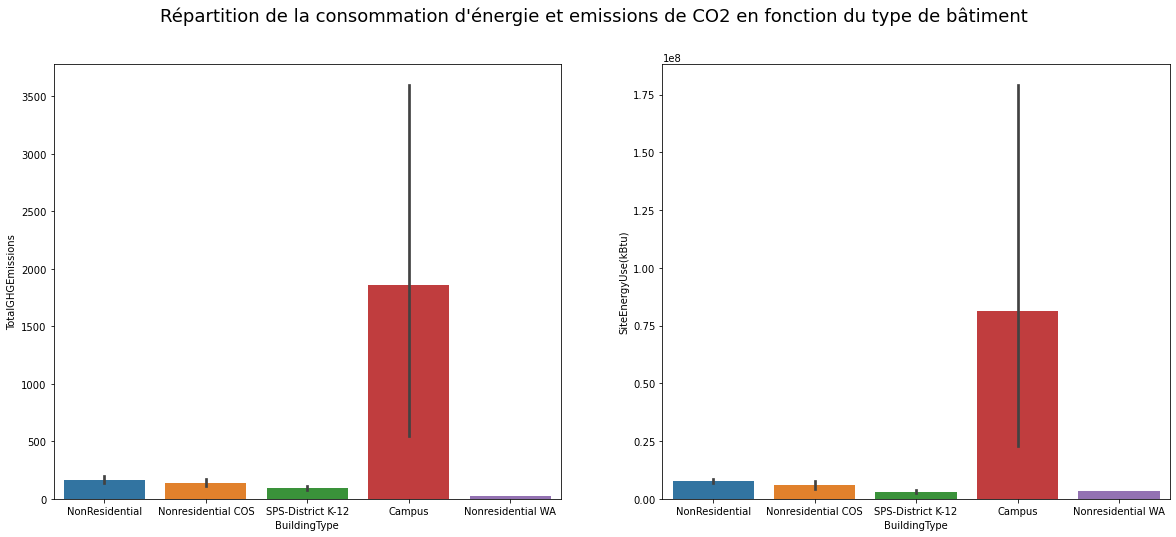

In [42]:
# Propriété du graphe 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

# graphe des deux graphe avec Seaborn
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])


plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", fontsize=18)
plt.show()

**Pour les details :**

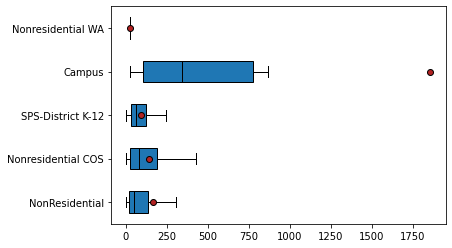

In [43]:
X = 'BuildingType' # qualitative
Y = 'TotalGHGEmissions' # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

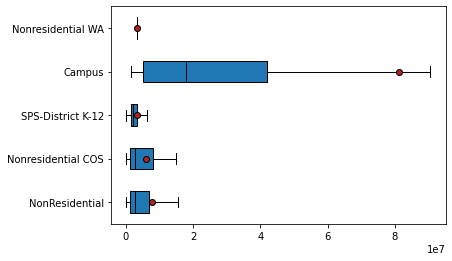

In [44]:
X = 'BuildingType' # qualitative
Y = 'SiteEnergyUse(kBtu)' # quantitative

modalites = data[X].unique()
groupes = []
for m in modalites:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

Sur ces diagrammes en barre, les campus se démarquent largement en terme de consommation et de rejets de CO2.

# <a name="5"> FEATURE ENGINEERING </a>

## <a name="C51"> 5.1) Transformation logarithmique </a>

Les transformations de données consistent en des manipulations permettant de révéler certaines caractéristiques des données originales qui ne peuvent pas ou pas facilement être observées. On peut procéder à la transformation de la distribution d'une variable de nos données pour la rendre plus facilement observable ou encore pour qu'elle corresponde aux hypothèses des tests statistiques que nous voulons appliquer.


NumberofBuildings


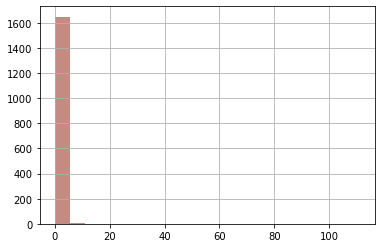

------------------------------------------------------------------------------------------------------------------------
NumberofFloors


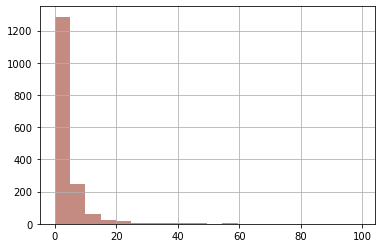

------------------------------------------------------------------------------------------------------------------------
PropertyGFATotal


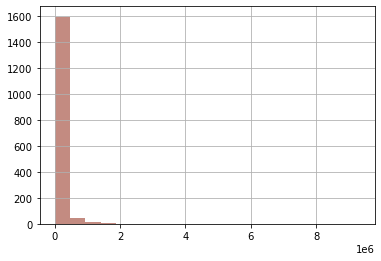

------------------------------------------------------------------------------------------------------------------------
PropertyGFAParking


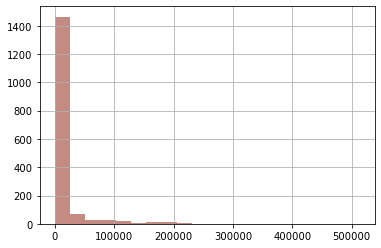

------------------------------------------------------------------------------------------------------------------------
PropertyGFABuilding(s)


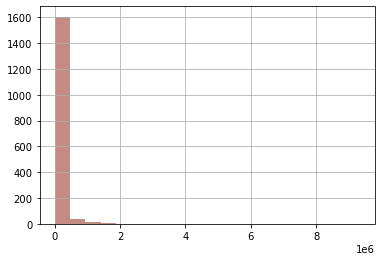

------------------------------------------------------------------------------------------------------------------------
ENERGYSTARScore


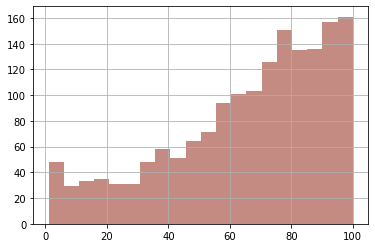

------------------------------------------------------------------------------------------------------------------------
SiteEUI(kBtu/sf)


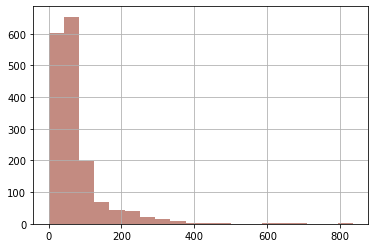

------------------------------------------------------------------------------------------------------------------------
SourceEUI(kBtu/sf)


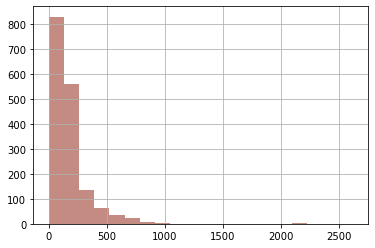

------------------------------------------------------------------------------------------------------------------------
SiteEnergyUse(kBtu)


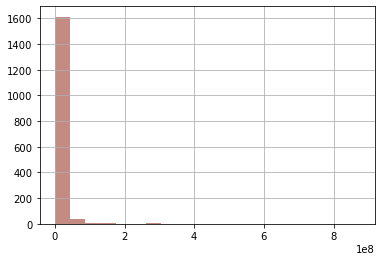

------------------------------------------------------------------------------------------------------------------------
SteamUse(kBtu)


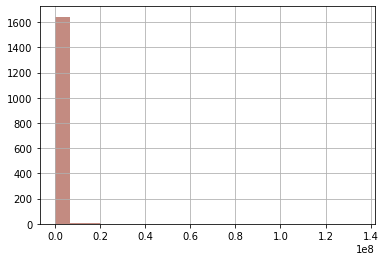

------------------------------------------------------------------------------------------------------------------------
Electricity(kBtu)


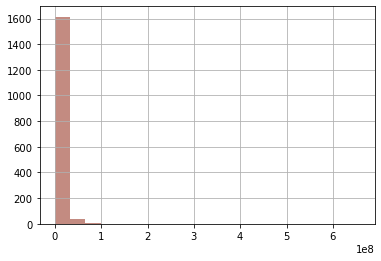

------------------------------------------------------------------------------------------------------------------------
NaturalGas(kBtu)


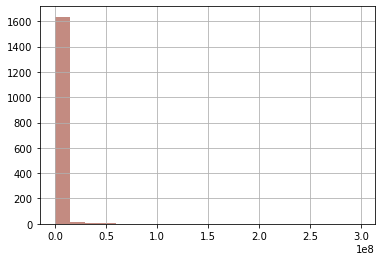

------------------------------------------------------------------------------------------------------------------------
TotalGHGEmissions


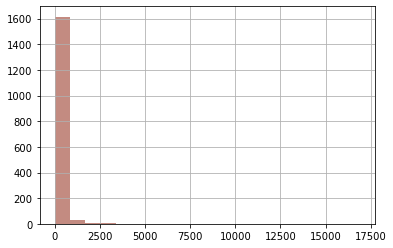

------------------------------------------------------------------------------------------------------------------------
GHGEmissionsIntensity


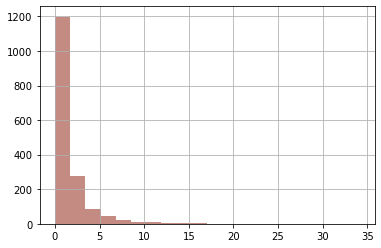

------------------------------------------------------------------------------------------------------------------------


In [45]:
# Selection les variables quantitatives
data1 = data.loc[:,'NumberofBuildings':]

# Representation de la distribution des colonnes
for column in data1 : 
    print(column)
    data1[column].hist(bins=20,color="#9C3E2D", alpha=0.6)
    plt.show()
    print('------'*20)

La distribution des variables n'est pas normale.

La transformation logarithmique consiste tout simplement à appliquer la fonction log à chacune des valeurs de la variable à transformer.Elle permet de rapprocher des valeurs extrêmes pour obtenir des graphes de distribution moins étendus.

In [46]:
# selection des colonnes à transformer
data1 = data1[['PropertyGFATotal','PropertyGFAParking' ,'PropertyGFABuilding(s)','SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
               'SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','TotalGHGEmissions']]

cols =['PropertyGFATotal','PropertyGFAParking' ,'PropertyGFABuilding(s)','SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
               'SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)','TotalGHGEmissions']
# Remplacons les valeurs inf à 1 par 0
for col in cols : 
    data1.loc[data1[col]<1,col]=0

In [47]:
# Calcul du logarithme
data1 = np.log(data1)
data1.sample(4)

C:\Users\dmedc\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
148,11.420042,-inf,11.420042,4.610158,5.571013,16.063888,-inf,15.774758,14.681927,5.169176
35,13.478771,-inf,13.478771,3.837299,4.982921,17.616181,-inf,17.616181,-inf,5.742490
134,11.081896,-inf,11.081896,3.806662,4.872905,14.895380,-inf,14.776272,12.708692,3.577389
1039,10.224629,-inf,10.224629,3.781914,4.926529,14.007245,-inf,14.007245,-inf,2.132982


Nous constatons des valeurs moins infini (-inf) en certains endroits; Nous allons les remplacer par la valeurs 0

In [48]:
# importer l'objet inf de la bibliothèque numpy
from numpy import inf 

for column in data1 : 
    data1.loc[data1[column]==-inf,column]=0
    
data1.describe().round(2)

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00
mean,11.04,2.09,10.97,3.91,4.79,14.78,1.00,14.36,9.77,3.94
std,0.95,4.22,0.91,0.92,0.97,1.93,3.70,1.83,6.33,1.53
min,9.33,0.00,8.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.29,0.00,10.26,3.52,4.34,14.03,0.00,13.49,0.00,3.00
50%,10.80,0.00,10.77,3.95,4.88,14.75,0.00,14.29,13.12,3.90
75%,11.56,0.00,11.46,4.40,5.32,15.75,0.00,15.39,14.24,4.96
max,16.05,13.15,16.05,6.73,7.87,20.59,18.72,20.30,19.51,9.73


PropertyGFATotal


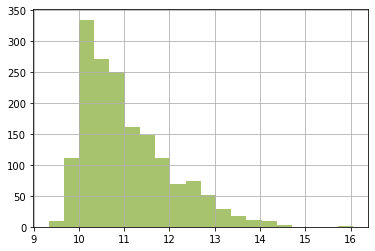

------------------------------------------------------------------------------------------------------------------------
PropertyGFAParking


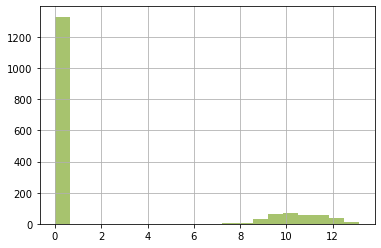

------------------------------------------------------------------------------------------------------------------------
PropertyGFABuilding(s)


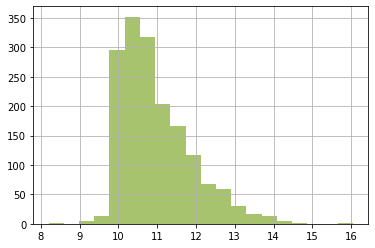

------------------------------------------------------------------------------------------------------------------------
SiteEUI(kBtu/sf)


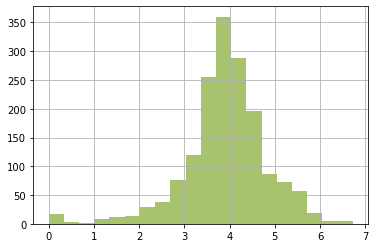

------------------------------------------------------------------------------------------------------------------------
SourceEUI(kBtu/sf)


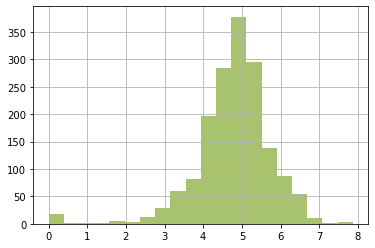

------------------------------------------------------------------------------------------------------------------------
SiteEnergyUse(kBtu)


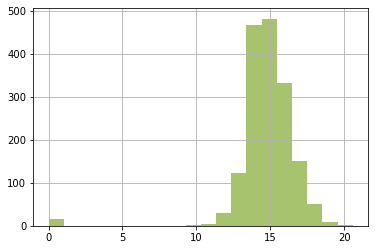

------------------------------------------------------------------------------------------------------------------------
SteamUse(kBtu)


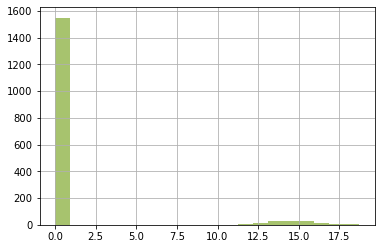

------------------------------------------------------------------------------------------------------------------------
Electricity(kBtu)


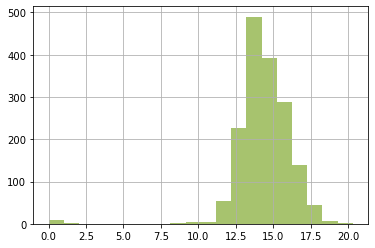

------------------------------------------------------------------------------------------------------------------------
NaturalGas(kBtu)


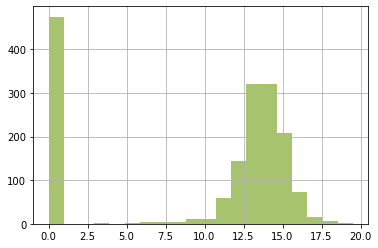

------------------------------------------------------------------------------------------------------------------------
TotalGHGEmissions


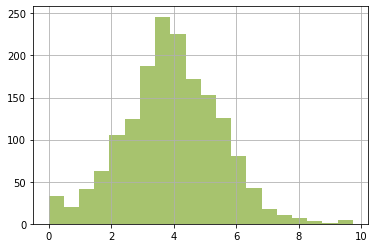

------------------------------------------------------------------------------------------------------------------------


In [49]:
# Representation de la distribution des colonnes
for column in data1 : 
    print(column)
    data1[column].hist(bins=20,color="#6D9C0E", alpha=0.6)
    plt.show()
    print('------'*20)

In [50]:
# Remplaçons les valeurs correspondantes dans data par celles de data1
Liste_Col = data1.columns   
data[Liste_Col] = data1[Liste_Col]

data.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,7,DOWNTOWN,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,15.793246,14.510597,15.188220,14.059596,5.521381,2.83
1,NonResidential,Hotel,7,DOWNTOWN,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,15.942305,0.000000,14.991963,15.453552,5.689886,2.86
2,NonResidential,Hotel,7,DOWNTOWN,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,18.100297,16.886654,17.718022,14.216834,7.644575,2.19
3,NonResidential,Hotel,7,DOWNTOWN,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,15.731636,14.610513,14.833969,14.409507,5.657494,4.67
4,NonResidential,Hotel,7,DOWNTOWN,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,16.466822,0.000000,15.496079,15.990716,6.224578,2.88


## <a name="C52"> 5.2) Renommage de variables </a>

Les Variables cibles de notre étude sont : 

- **TotalGHGEmissions**
- **SiteEnergyUse(kBtu)**

Nous allons les renommer.

In [51]:
data = data.rename(columns={"SiteEnergyUse(kBtu)" : "Target_Energies" , "TotalGHGEmissions" : "Target_GES"})
data.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),Target_Energies,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Target_GES,GHGEmissionsIntensity
0,NonResidential,Hotel,7,DOWNTOWN,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,15.793246,14.510597,15.188220,14.059596,5.521381,2.83
1,NonResidential,Hotel,7,DOWNTOWN,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,15.942305,0.000000,14.991963,15.453552,5.689886,2.86
2,NonResidential,Hotel,7,DOWNTOWN,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,18.100297,16.886654,17.718022,14.216834,7.644575,2.19
3,NonResidential,Hotel,7,DOWNTOWN,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,15.731636,14.610513,14.833969,14.409507,5.657494,4.67
4,NonResidential,Hotel,7,DOWNTOWN,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,16.466822,0.000000,15.496079,15.990716,6.224578,2.88


## <a name="C53"> 5.3) Label encoding </a>

In [52]:
cols = ['BuildingType','PrimaryPropertyType','Neighborhood']
data_le = data

In [53]:
# Créer l'encodeur et adapter la trame de données
le = LabelEncoder()
for col in cols :
    data_le[col]= le.fit_transform(data_le[col]) 

In [54]:
data_le.head()

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),Target_Energies,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Target_GES,GHGEmissionsIntensity
0,1,2,7,6,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,15.793246,14.510597,15.188220,14.059596,5.521381,2.83
1,1,2,7,6,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,15.942305,0.000000,14.991963,15.453552,5.689886,2.86
2,1,2,7,6,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,18.100297,16.886654,17.718022,14.216834,7.644575,2.19
3,1,2,7,6,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,15.731636,14.610513,14.833969,14.409507,5.657494,4.67
4,1,2,7,6,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,16.466822,0.000000,15.496079,15.990716,6.224578,2.88


In [55]:
data_le.describe().round(2)

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),Target_Energies,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Target_GES,GHGEmissionsIntensity
count,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00,1663.00
mean,1.21,11.47,4.35,8.97,54.10,1.17,4.12,11.04,2.09,10.97,65.66,3.91,4.79,14.78,1.00,14.36,9.77,3.94,1.61
std,0.74,6.43,2.19,3.86,32.73,2.93,6.57,0.95,4.22,0.91,26.27,0.92,0.97,1.93,3.70,1.83,6.33,1.53,2.34
min,0.00,0.00,1.00,0.00,1.00,0.00,0.00,9.33,0.00,8.20,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,5.00,2.00,6.00,27.00,1.00,1.00,10.29,0.00,10.26,49.25,3.52,4.34,14.03,0.00,13.49,0.00,3.00,0.35
50%,1.00,10.00,4.00,9.00,51.00,1.00,2.00,10.80,0.00,10.77,72.00,3.95,4.88,14.75,0.00,14.29,13.12,3.90,0.88
75%,1.00,17.00,7.00,11.00,86.00,1.00,4.00,11.56,0.00,11.46,87.00,4.40,5.32,15.75,0.00,15.39,14.24,4.96,1.90
max,4.00,21.00,7.00,18.00,116.00,111.00,99.00,16.05,13.15,16.05,100.00,6.73,7.87,20.59,18.72,20.30,19.51,9.73,34.09


In [56]:
data_le.shape

(1663, 19)

### Export en csv

In [57]:
data_le.to_csv(".\le_Data",index=False)

## <a name="C54"> 5.4) One Hot Encoding </a>

In [58]:
data1 = data[['BuildingType','PrimaryPropertyType','Neighborhood']]

data_ohe = data

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Créer l'encodeur et adapter la trame de données
ohe = OneHotEncoder(sparse=False).fit(data1)
data2= ohe.transform(data1) 

# convertir en dataframe
data2 = pd.DataFrame (data2,columns=ohe.get_feature_names_out())

data2.head()

,BuildingType_0,BuildingType_1,BuildingType_2,BuildingType_3,BuildingType_4,PrimaryPropertyType_0,PrimaryPropertyType_1,PrimaryPropertyType_2,PrimaryPropertyType_3,PrimaryPropertyType_4,...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Ajouter les colonnes de la data2 à la data
cols = data2.columns
for col in cols:
    data_ohe[col] = data2[col]
    
# Supprimer les colonnes transformées    
data_ohe = data_ohe.drop(['BuildingType','PrimaryPropertyType','Neighborhood'],axis=1)

In [61]:
data_ohe.head()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
0,7,89,1.0,12,11.390012,0.000000,11.390012,60.0,4.403054,5.206750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,20,1.0,11,11.547964,9.620063,11.390780,61.0,4.551769,5.171052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,47,1.0,41,13.770628,12.189527,13.540273,43.0,4.564348,5.488524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,90,1.0,10,11.023861,0.000000,11.023861,56.0,4.707727,5.376204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,36,1.0,18,12.075850,11.034890,11.640263,75.0,4.743192,5.353752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
data_ohe.describe().round()

,CouncilDistrictCode,AgeBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,...,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,4.0,54.0,1.0,4.0,11.0,2.0,11.0,66.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.0,33.0,3.0,7.0,1.0,4.0,1.0,26.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,0.0,0.0,9.0,0.0,8.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,27.0,1.0,1.0,10.0,0.0,10.0,49.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.0,51.0,1.0,2.0,11.0,0.0,11.0,72.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.0,86.0,1.0,4.0,12.0,0.0,11.0,87.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,7.0,116.0,111.0,99.0,16.0,13.0,16.0,100.0,7.0,8.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [63]:
data_ohe.shape

(1663, 62)

### Export csv

In [64]:
data_ohe.to_csv(".\ohe_Data",index=False)